<a href="https://colab.research.google.com/github/Flobandeo/flobandeo-datascience/blob/main/Copia_de_Estudio_Variable_con_api_con_Regresion_Lineal_BankChurners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ESTUDIO DE USUARIOS DE TARJETAS DE CREDITO

### Importacion de Galerias y API

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.close("all")
import requests
import json
import numpy  as np

In [2]:
# se solicita permisos para Drive
from google.colab import drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Importando el sistema de archivos que nos provee Colab
from google.colab import files

In [5]:
# Instalando kaggle
!pip install kaggle --upgrade

In [6]:
#Creación y carga de API key
files.upload()

Saving kaggle-2.json to kaggle-2.json


{'kaggle-2.json': b'{"username":"florenciabandeo","key":"96e8d2d1982f88e9cbf093b2f4392d4b"}'}

In [7]:
#reamos una carpeta oculta en el sistema de archivos con el nombre .kaggle.
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [8]:
#Cambiamos los permisos para permitir lectura de las credenciales.
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [9]:
#Probando la conexión a la API de Kaggle
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [10]:
#Descargando un archivo desde Kaggle a nuestro Drive
! kaggle datasets download -d syviaw/bankchurners

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [11]:
#Importamos la librería drive desde google.colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
#Descomprimir el archivo desde drive
!mkdir '/content/drive/My Drive/Colab Notebooks/APISFlorenciabandeo/'

mkdir: cannot create directory ‘/content/drive/My Drive/Colab Notebooks/APISFlorenciabandeo/’: File exists


In [15]:
#descomprimiremos el archivo utilizando el comando unzip
!unzip <bankchurners.zip> -d <'/content/drive/My Drive/Colab Notebooks/APISFlorenciabandeo/'>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `unzip <bankchurners.zip> -d <'/content/drive/My Drive/Colab Notebooks/APISFlorenciabandeo/'>'


In [16]:
!unzip bankchurners.zip -d '/content/drive/My Drive/Colab Notebooks/APISFlorenciabandeo/'

unzip:  cannot find or open bankchurners.zip, bankchurners.zip.zip or bankchurners.zip.ZIP.


In [13]:
#creamos el dataframe
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/APISFlorenciabandeo/BankChurners.csv')

### ABSTRACT
A menudo, las entidades financieras como proveedoras de tarjetas de créditos se ven obligadas a investigar los cambios monetarios y de moda de los usuarios.
Estas entidades tienen que estar a la vanguardia en promociones de consumo, porque en este mercado es mucha la competencia.
Al mismo tiempo, se deben estar en constante observación sobre el comportamiento del usuario, como por ejemplo los límites de compras según los ingresos de los usuario.
Dicho lo anterior, en este proyecto se trata de analizar el comportamiento de los usuarios Femeninos de las tarjetas de créditos, utilizando la información recabada según la edad, estado civil, su ingreso y categoría de tarjeta de crédito comparándolos.

###OBJETIVO
Este estudio es para analizar una nueva política de venta a clientes femeninos.

## CONTEXTO COMERCIAL
#El marco general del proyecto de machine learning
Se  quiere crear una nueva campaña comercial para captar a nichos de usuarias de tarjetas de credito que aun no componen la cartera de clientes. Estamos trabajando con un equipo marketing y analistas de datos, con quienes estaremos construyendo el primer análisis de los datos.





## PROBLEMA COMERCIAL


#El dominio del problema.
#Objetivo específico que la solución de machine learning debe abordar para resolver un problema o necesidad empresarial.
El Líder de Data Science de la compañía quiere que produzcamos una nueva campaña de marketing, por lo que se desea estudiar como se comportan dicho mercado.


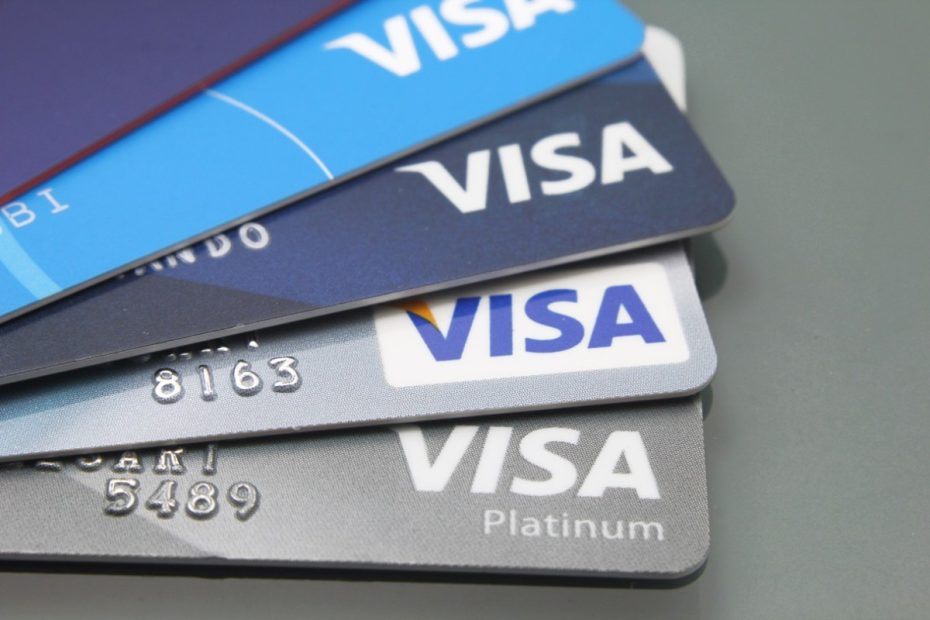[texto del enlace](https://www.google.com/url?sa=i&url=https%3A%2F%2Fa-dele.com%2Fnumero-ideal-de-tarjetas-de-credito%2F&psig=AOvVaw1_QG_HNVcaibe8PK3pRvug&ust=1680117727446000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCPiUjbSs__0CFQAAAAAdAAAAABAF)



Tanto el Contexto, como el Problema Comercial, son importantes para el éxito de un proyecto de Machine Learning y deben ser considerados cuidadosamente durante todo el ciclo de vida del proyecto.

# BUSINESS ANALYTIC
#Origen y descripcion de los datos bajo analisis

Estos datos proviene de una empresa emisora de tarjeta de credito, con el cual trabajaremos en este caso para poder aplicar el objetivo principal.

In [14]:
df.describe()  # este comnado es para mostrar datos estadisticos
# el count muestra la cant de filas

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [15]:
df.info()  # muestra el tipo de datos de cada columna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [16]:
#Analis de Nulos
df.isna().sum().sort_values(ascending = False)

CLIENTNUM                                                                                                                             0
Contacts_Count_12_mon                                                                                                                 0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    0
Avg_Utilization_Ratio                                                                                                                 0
Total_Ct_Chng_Q4_Q1                                                                                                                   0
Total_Trans_Ct                                                                                                                        0
Total_Trans_Amt                                                                                                                       0
Total_Amt_Chng_Q4_Q1                            

In [17]:
#Analisis de tipo de datos
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

Podemos ver algunos valores útiles. NO exiten filas vacias o nulas


## Análisis Exploratorio


El análisis exploratorio es el paso donde ahondamos en el set de datos, para poder contestar preguntas como:

* ¿Cómo se distribuyen los datos?

* ¿Hay correlaciones con mis datos?

* ¿Existen factores de confusión que expliquen estas correlaciones?


In [18]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [19]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


## ANALISIS VARIABLES CATEGORICAS

In [20]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

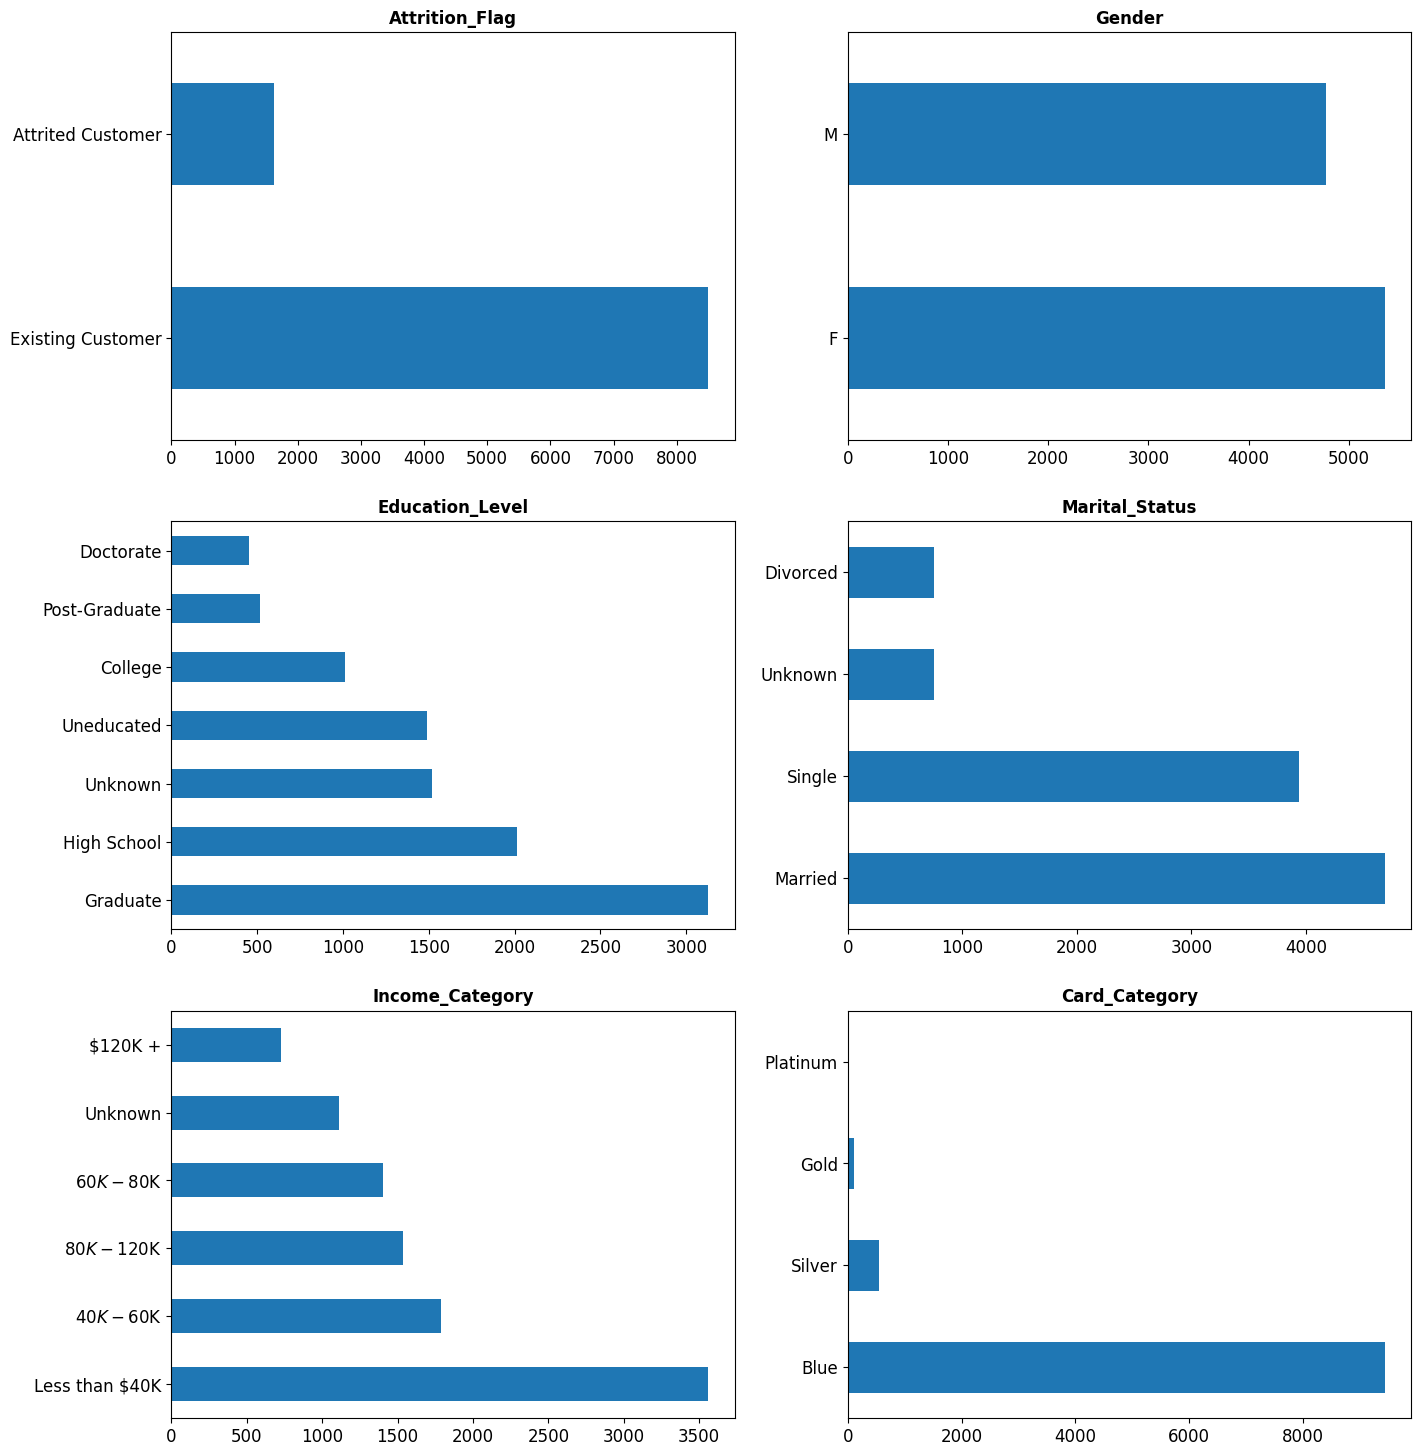

In [21]:
graficos_eda_categoricos(df.select_dtypes('O'))

## ANALISIS VARIABLES NUMERICAS

In [22]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [23]:
#Se borra columnas
df_delete = df.drop(['CLIENTNUM' , 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)

In [24]:
estadisticos_cont(df_delete.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,46.0,8.016814,26.0,41.0,46.0,52.0,73.0
Dependent_count,10127.0,2.346203,2.0,1.298908,0.0,1.0,2.0,3.0,5.0
Months_on_book,10127.0,35.928409,36.0,7.986416,13.0,31.0,36.0,40.0,56.0
Total_Relationship_Count,10127.0,3.812580,4.0,1.554408,1.0,3.0,4.0,5.0,6.0
Months_Inactive_12_mon,10127.0,2.341167,2.0,1.010622,0.0,2.0,2.0,3.0,6.0
Contacts_Count_12_mon,10127.0,2.455317,2.0,1.106225,0.0,2.0,2.0,3.0,6.0
Credit_Limit,10127.0,8631.953698,4549.0,9088.776650,1438.3,2555.0,4549.0,11067.5,34516.0
Avg_Open_To_Buy,10127.0,7469.139637,3474.0,9090.685324,3.0,1324.5,3474.0,9859.0,34516.0
Total_Trans_Ct,10127.0,64.858695,67.0,23.472570,10.0,45.0,67.0,81.0,139.0


Ahora veremos una matriz de gráficos de dispersión. Estos gráficos muestran la distribución en la diagonal principal, y además muestran la relación entre variables en las combinaciones de las variables.

Ahora se hace el filtrado de informacion para poder arribar al resultado esperado.

In [25]:
df_delete.info()  # muestra el tipo de datos de cada columna  - No hay datos vacios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

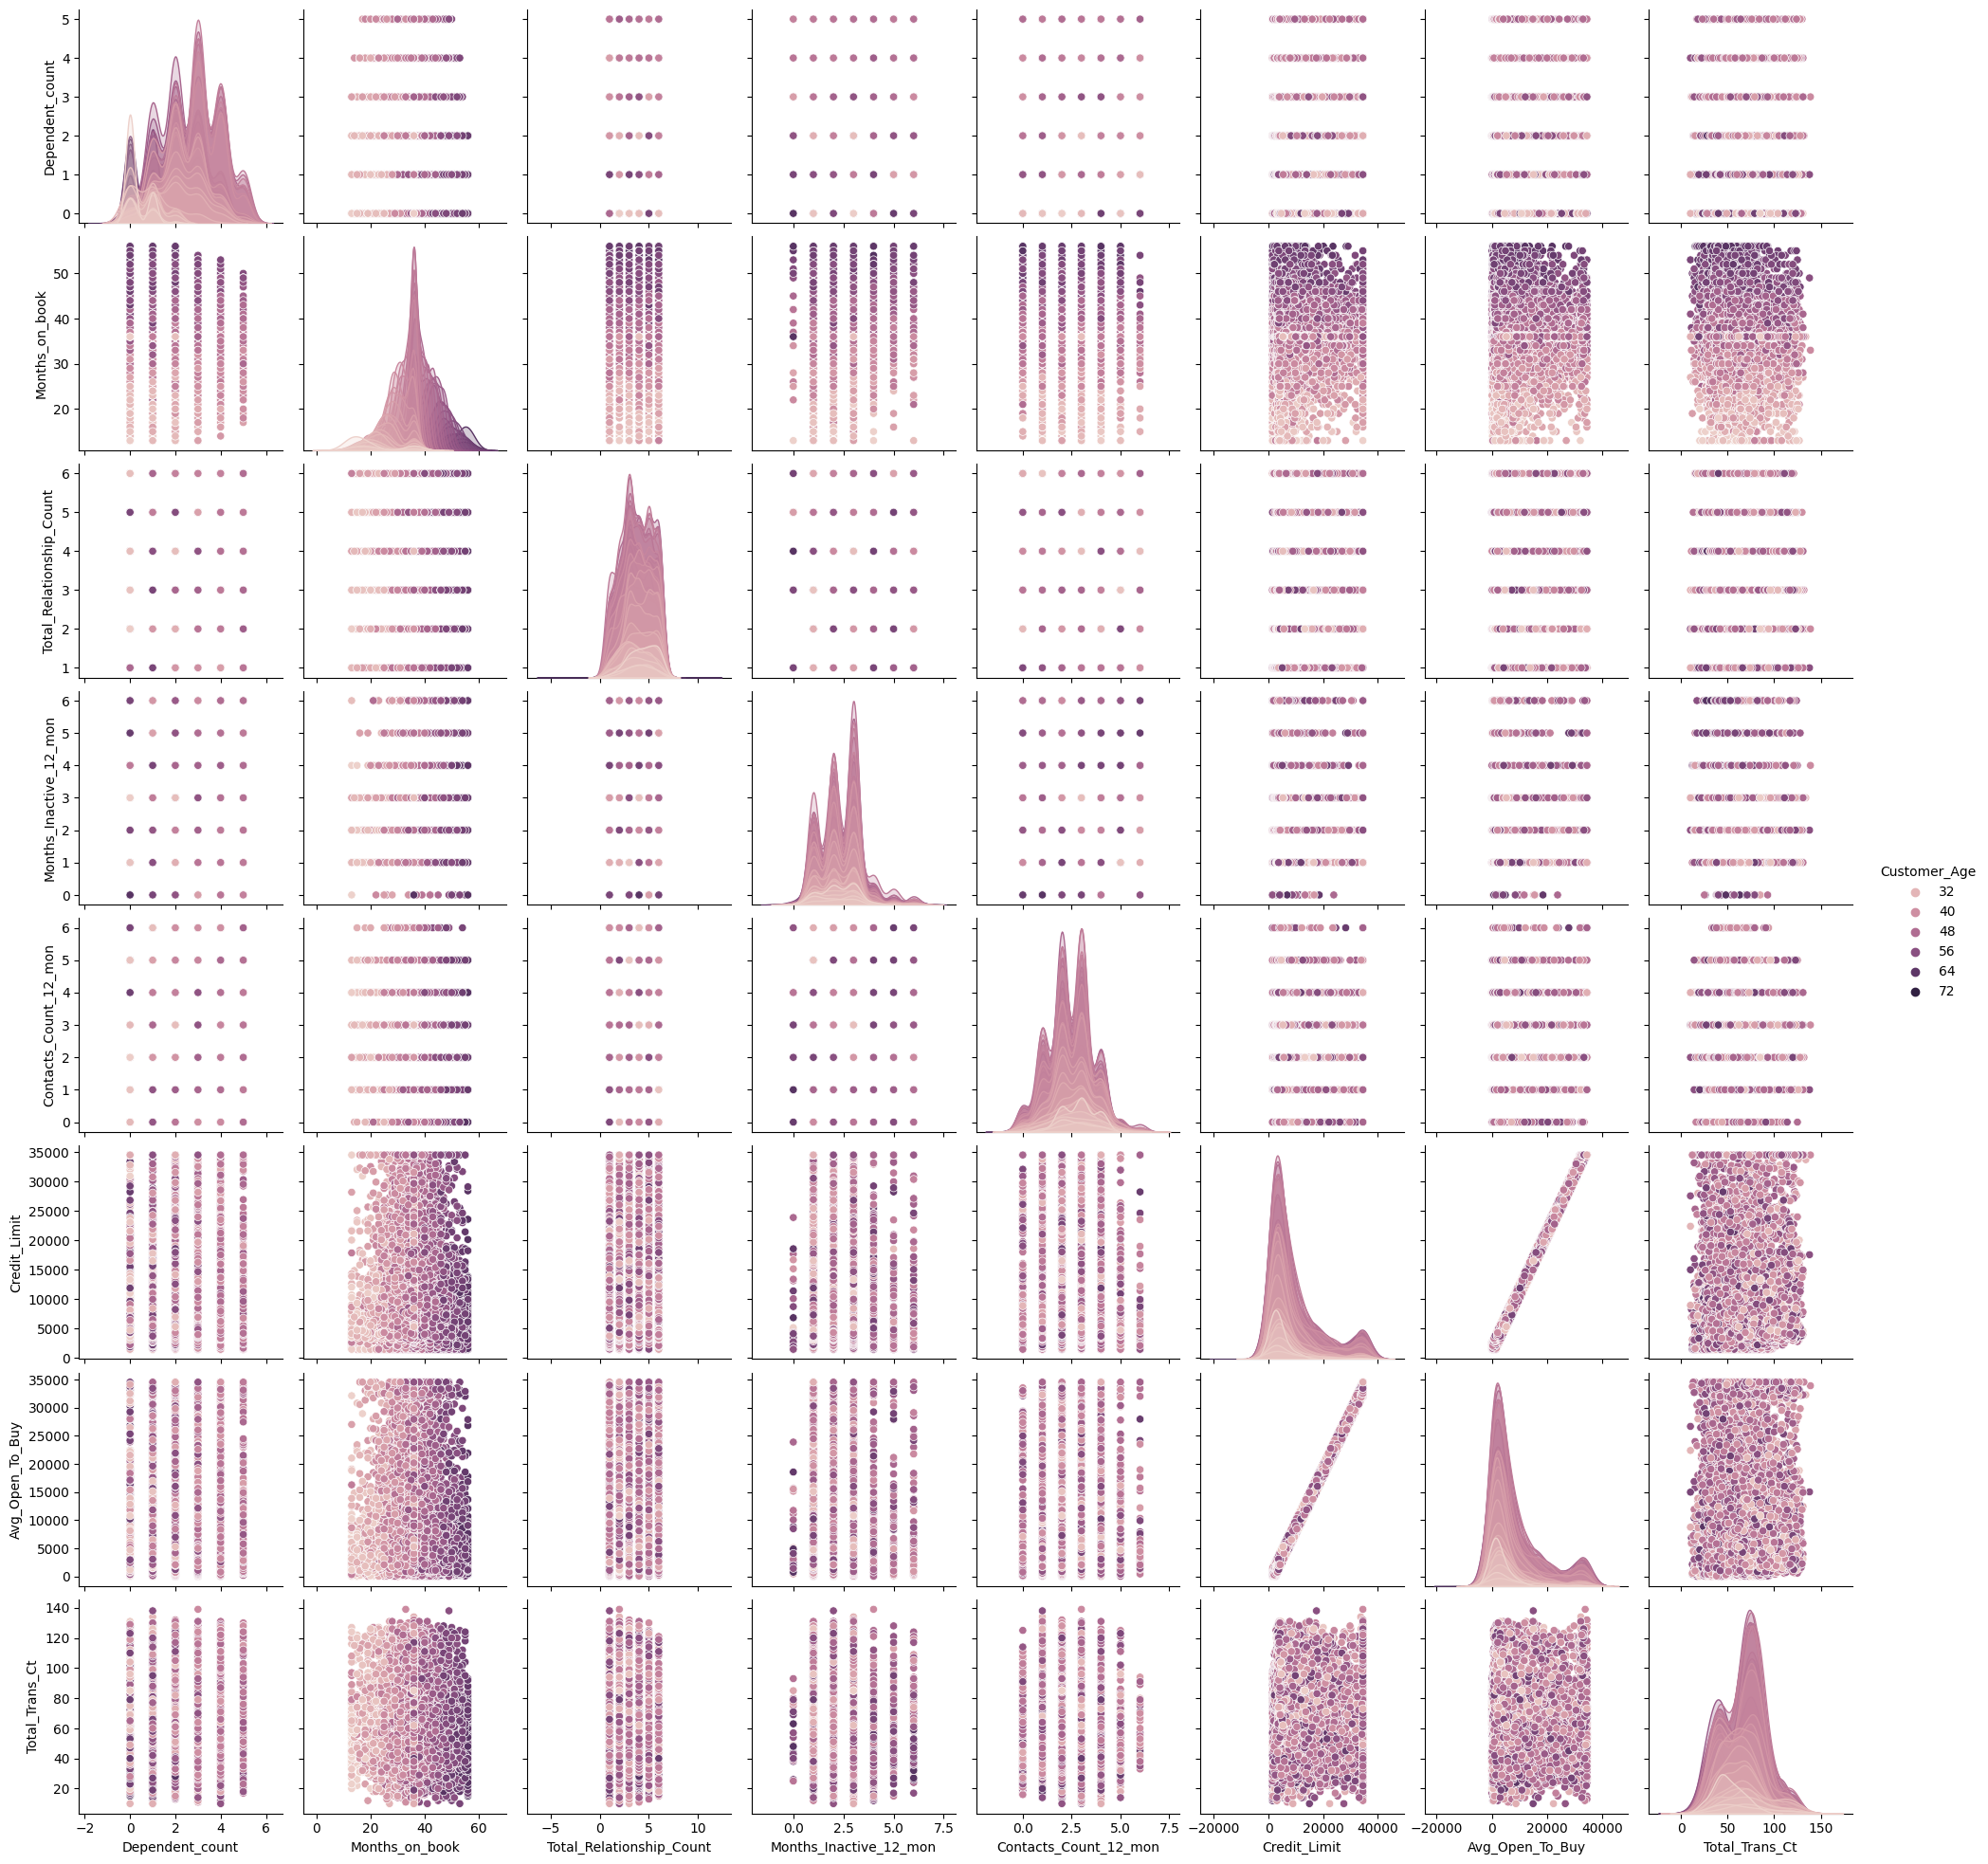

In [26]:
# Para hacer este gráfico, eliminaremos los nulos porque traen problemas para
# graficar, al no saber que hacer con ellos.

sns.pairplot(df_delete, hue = 'Customer_Age')

Al ver el gráfico podemos determinar que no existe problema a la vista, po rlo que se entiende que los datos de nuestro campo de estudio estan optimos para ser modelados.

## GENERACIÓN DE INSIGHTS

### Cual es la tasa de usuarios de tarjeta segun su sexo?

In [27]:
df_delete.Gender.value_counts(normalize = True) * 100

F    52.908068
M    47.091932
Name: Gender, dtype: float64

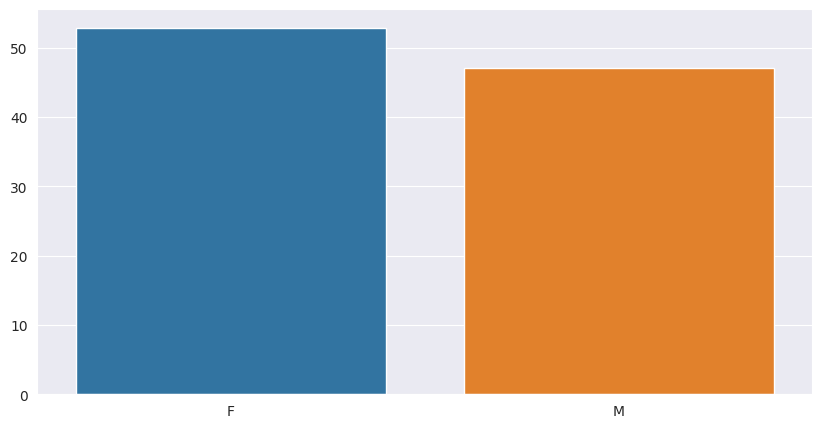

In [28]:
# Este plot es para graficar los valores calculados en la celda anterior
Clientes_Activos_graf=df_delete.Gender.value_counts(normalize = True) * 100
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.barplot(x=Clientes_Activos_graf.index, y=Clientes_Activos_graf.values)
plt.show()

### Analisis del comportamiento de los usuarios de tarjetas de credito de sexo femenino



In [29]:
# Transformar gender a numérica
df_delete['Gender'] = df_delete.Gender.map({'F':1, 'M':0})

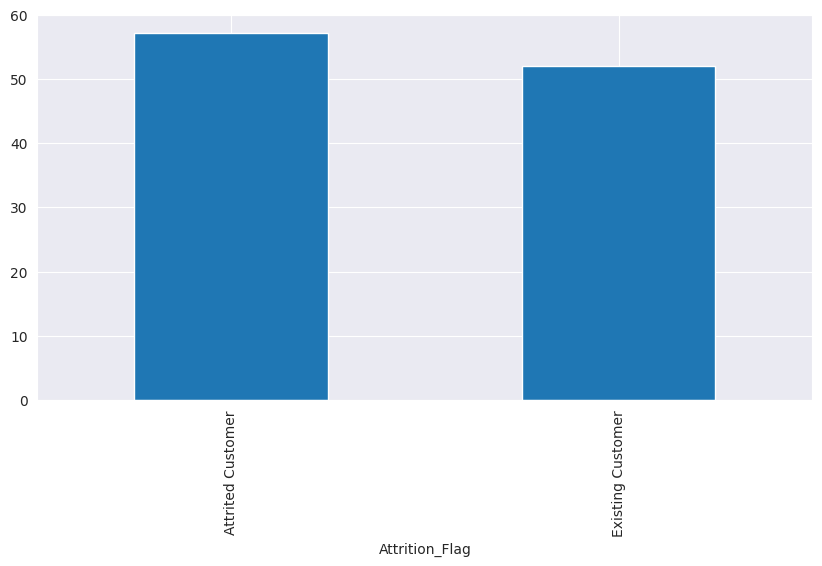

In [30]:
# Analisis de usuario Femenino activos
plt.figure(figsize=(10,5))
temp = df_delete.groupby('Attrition_Flag').Gender.mean().sort_values(ascending = False) * 100
temp.plot.bar();

### Comparativa entre estado civil

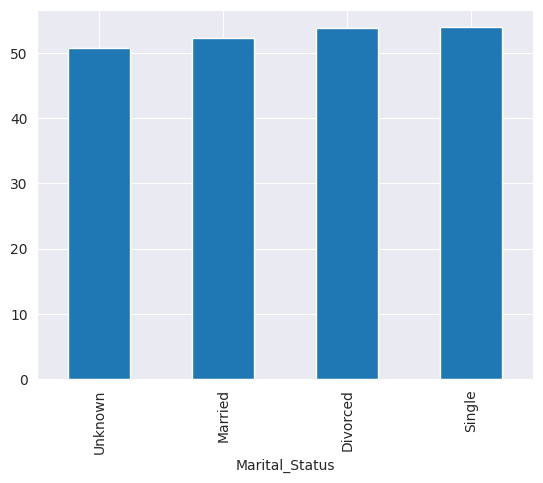

In [31]:
# Analisis por estado civil
temp = df_delete.groupby('Marital_Status').Gender.mean().sort_values(ascending = True) * 100
temp.plot.bar();

### Comparativa entre categoria de Tarjeta de credito

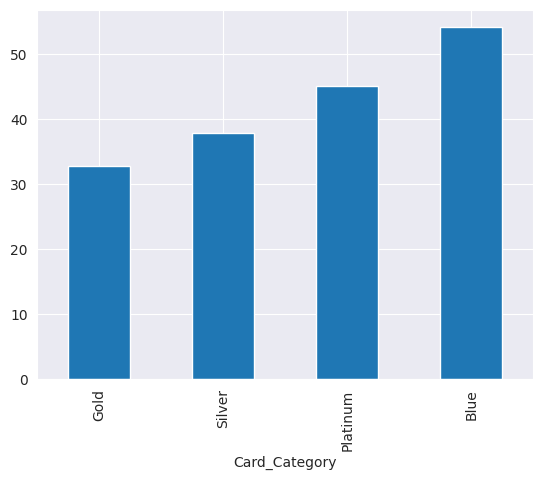

In [32]:
temp = df_delete.groupby('Card_Category').Gender.mean().sort_values(ascending = True) * 100
temp.plot.bar();

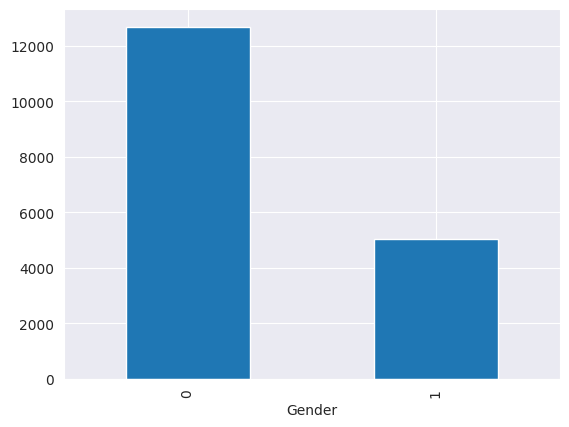

In [33]:
temp = df_delete.groupby('Gender').Credit_Limit.mean()
temp.plot.bar();

### Conclusión
Este estudio sobre los usuarios femeninos:
Si bien no hay mucha diferencia sobre el usuario femenino con respecto al masculino, y considereando que existen gran cantidad de usuarios dados de baja con respecto a los activos, se analizo que los usuarios femeninos actualmente son la mayoria solteras y divorciadas, y que gozan de una categoria de tarjetas de credito baja, sumando a eso los ingresos de son menores.

## ANALISIS DE PERFIL

### Entonces, Que perfil debemos elegir para la nueva campaña de la tarjeta de credito?

In [34]:
df_delete_F = df_delete.loc[df['Gender']=='F']
df_delete_F

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Ct
1,Existing Customer,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,7392.0,33
3,Existing Customer,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,796.0,20
14,Existing Customer,57,1,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,1756.0,29
19,Existing Customer,45,1,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,13313.0,21
21,Attrited Customer,62,1,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,1438.3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,Existing Customer,58,1,0,Graduate,Single,Less than $40K,Blue,48,2,2,5,4299.0,2965.0,123
10119,Attrited Customer,55,1,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,12140.0,53
10121,Existing Customer,56,1,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,3082.0,120
10124,Attrited Customer,44,1,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,5409.0,60


### Quien utiliza mas las tarjetas de creditos segun la edad y su estado civil?

<Axes: xlabel='Customer_Age', ylabel='Count'>

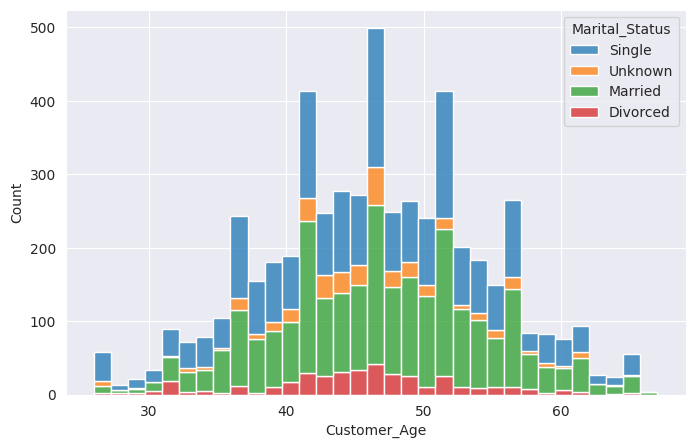

In [35]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_delete_F, x='Customer_Age' , hue="Marital_Status", multiple="stack")

Se realizó una comparativa del status marital de los usuarios Femenino de las tarjetas de créditos, como se puede observar, las solteras y casadas con edad mayor de 39 son usuarios de las tarjetas de credito.

### Las usuarias le corresponden los ingresos con el limite de credito con respecto a su categoria?

Text(0, 0.5, 'Limite de Credito')

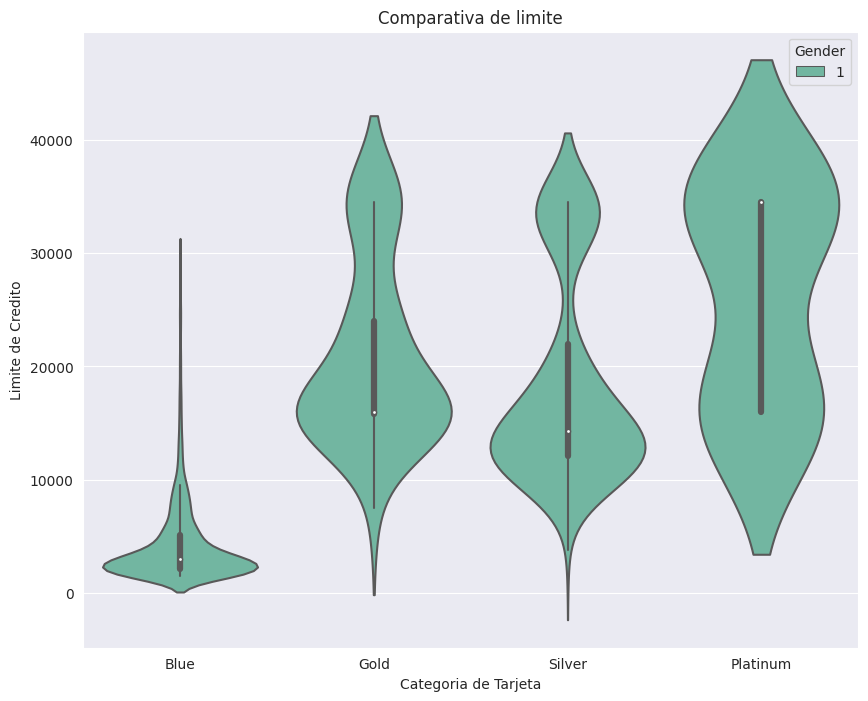

In [36]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Card_Category', y='Credit_Limit', data=df_delete_F ,hue= 'Gender',palette='Set2');
plt.title ('Comparativa de limite')
plt.xlabel ("Categoria de Tarjeta")
plt.ylabel("Limite de Credito")

En este gráfico, se puede observar las diferencias en los usuarios Femenino, categorizados por el tipo de tarjeta y el límite de credito, es decir, se puede observar que límite de credito, esta relacionada con los ingresos . Como tambien se puede observar que este grafico que las usuarias son mayormente de status Silver, teniendo un ingreso hasta 45000.
mas alla de ello, se puede demostrar que las usuaria con ingresos de 10000 a 15000 obstentan un status de tarjetas gold y silver. Tambien otro cuestion que se puede ver es que las usuarias con la categoria Blue con un ingreso de 0 a 5000 son predominantes.

### El promedio de gastos de las usuarias se condice con los ingresos?

Text(0.5, 0, 'Promedio de Gasto')

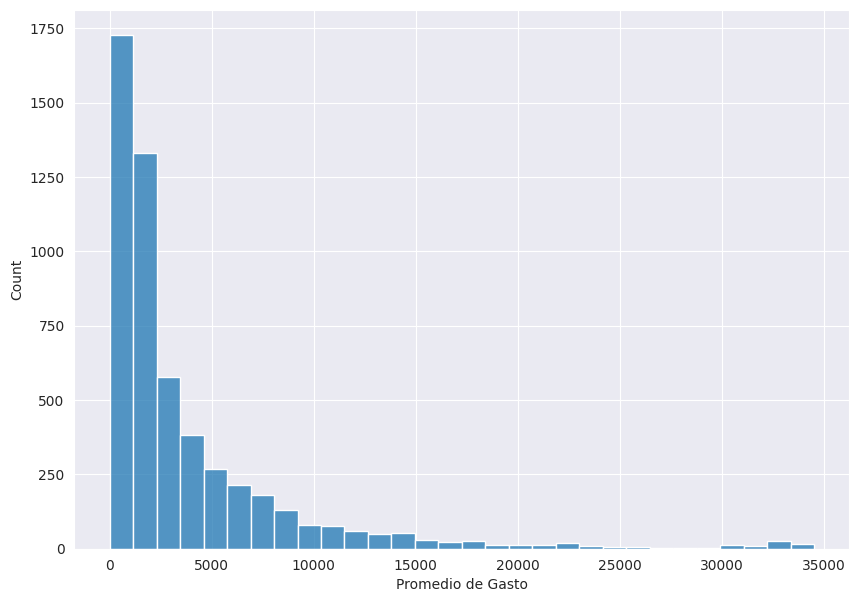

In [37]:
plt.figure(figsize=(10,7))
sns.histplot(df_delete_F['Avg_Open_To_Buy'], kde=False,bins=30)
plt.xlabel ("Promedio de Gasto")

En este grafico se compara la cantidad - promedio que tiene el consumidor Femenino para gastar con la tarjeta de credito donde se puede observar que la mayor cantidad de usuarios de bajo promedio son los que predominan, esta relacionado con el grafico anterior donde se muestar que su status es mayormente Blue.

### Mayor usuarias de tarjetas segun ingreso

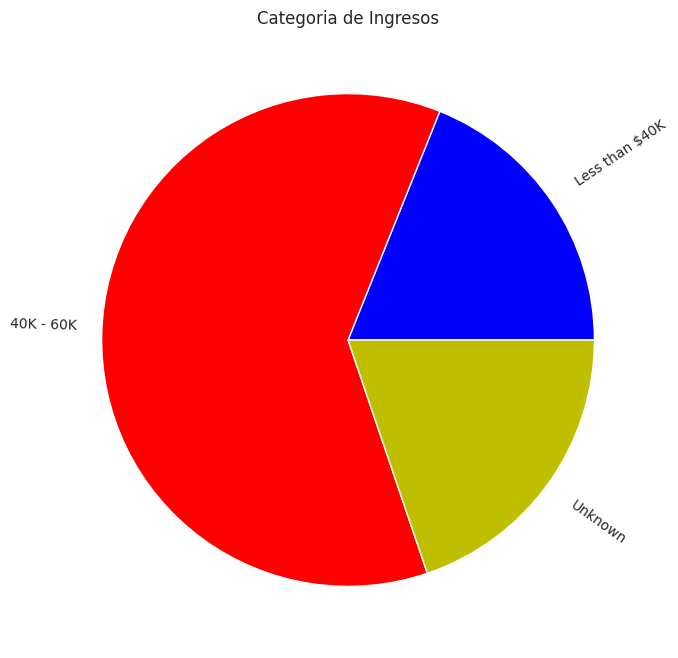

In [38]:
df_for_pie = df.groupby(by=df_delete_F['Income_Category']).size()
plt.figure(figsize=(8,8))
labels =['Less than $40K' , '40K - 60K', 'Unknown' ]
colors = ['Blue', 'red', 'y', 'green', 'orange' , 'violet']
plt.title ('Categoria de Ingresos')
plt.pie (df_for_pie, labels = labels ,colors = colors, rotatelabels = True);

En este Pie se puede observar cual es la categoria de ingresos  que tiene mayor predominancia, por lo que los usuarios entre 40.000 a 60.000 dolares de ingresos son los que prevalence ante el resto.

### La cantidad de Transacciones segun el limite de credito

Text(0, 0.5, 'Total de Transacciones')

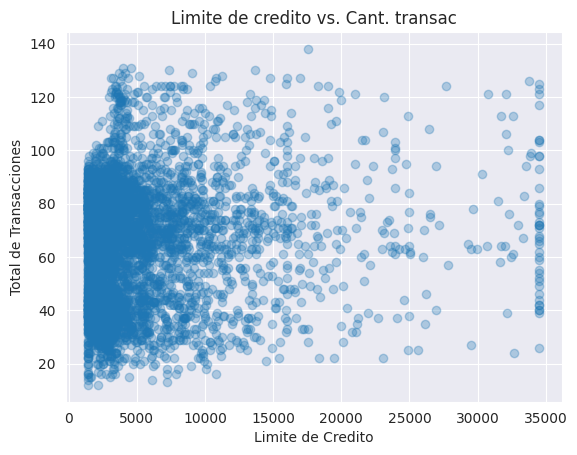

<Figure size 1500x1000 with 0 Axes>

In [39]:
fig, ax = plt.subplots()
plt.figure(figsize=(15,10))
ax.scatter(df_delete_F['Credit_Limit'], df_delete_F['Total_Trans_Ct'], alpha=0.300)
ax.set_title('Limite de credito vs. Cant. transac')
ax.set_xlabel('Limite de Credito')
ax.set_ylabel('Total de Transacciones')

En ese Plot, se analiza el limite de credito con el total de transacciones por usuario, y se puede observar que la mayor cantidad de transacciones son las tarjetas que tienen menos credito. determinando que a mayor cantidad de ingresos son menores los consumos que se registran.

### Analisis del Limite de credito

Text(0.5, 1.0, 'Cantidad vs Limite de credito')

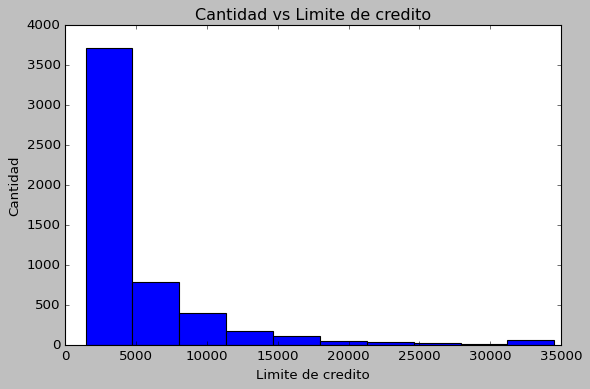

In [40]:
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(x= df_delete_F.Credit_Limit, bins=None, density=False, orientation='vertical')
ax.set_xlabel('Limite de credito')
ax.set_ylabel('Cantidad')
ax.set_title('Cantidad vs Limite de credito')

En este grafico se puede observar la relacion que existe entre la cantidad de credito con respecto al limite del mismo, es decir que los limites de creditos menores son los que mas operaciones realizan, confirmando los analisis anteriores.

## CONCLUSION
En conclusión a ello, ya que los usuarios mas recurrentes son las mujeres mayores a 39 años de edad con un estado civil solteras y casadas, de las cuales cuentan con una ingreso promedio de 40.000 a 60.000.
Pero las usuarias con status Blue son las que mas transacciones realizan.
Entonces se podria planificar una campaña de publicidad para abarcar el nicho de mercado que esta dado por las menores de 39, otorgando una base crediticia Blue, y luego analizar el comportamiento financiero para alevar a silver.
Por lo que este analisis estrai enfocada a la a realizar promociones para ello.

## MACHINE LEARNING

### Modelo de Regresion, Limite credito con relacion a la educacion, edad,  los ingresos y estado civil

In [41]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
df_delete

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Ct
0,Existing Customer,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,11914.0,42
1,Existing Customer,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,7392.0,33
2,Existing Customer,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,3418.0,20
3,Existing Customer,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,796.0,20
4,Existing Customer,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,4716.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,0,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,2152.0,117
10123,Attrited Customer,41,0,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2091.0,69
10124,Attrited Customer,44,1,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,5409.0,60
10125,Attrited Customer,30,0,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,5281.0,62


In [43]:
df_delete['Attrition_Flag'] = df_delete.Gender.map({'Existing Customer':1, 'Attrited Customer':0})

In [99]:
df_delete_F

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Ct
1,Existing Customer,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,7392.0,33
3,Existing Customer,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,796.0,20
14,Existing Customer,57,1,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,1756.0,29
19,Existing Customer,45,1,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,13313.0,21
21,Attrited Customer,62,1,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,1438.3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,Existing Customer,58,1,0,Graduate,Single,Less than $40K,Blue,48,2,2,5,4299.0,2965.0,123
10119,Attrited Customer,55,1,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,12140.0,53
10121,Existing Customer,56,1,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,3082.0,120
10124,Attrited Customer,44,1,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,5409.0,60


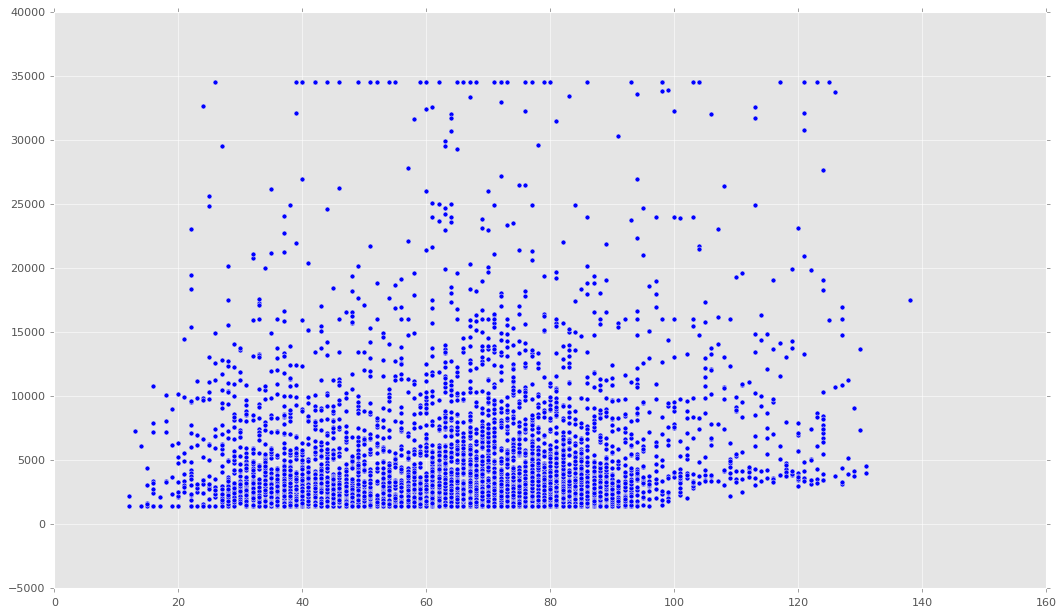

In [45]:
colores=['orange','blue']
tamanios=[20,30]

f1 = df_delete_F['Total_Trans_Ct'].values
f2 = df_delete_F['Credit_Limit'].values

plt.scatter(f1, f2, s=tamanios[0])
plt.show()

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

%matplotlib inline
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as sm
warnings.simplefilter(action="ignore", category=FutureWarning)

In [47]:
model1 = 'Credit_Limit~Attrition_Flag +Education_Level+ Customer_Age +  Income_Category + Marital_Status'
lm1    = sm.ols(formula = model1, data = df_delete_F).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:           Credit_Limit   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     92.17
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          3.75e-223
Time:                        20:10:01   Log-Likelihood:                -52959.
No. Observations:                5358   AIC:                         1.059e+05
Df Residuals:                    5344   BIC:                         1.060e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

#### Conclusion de modelo
Nuestra variable dependiente es 'Credit_Limit', usamos MCO conocidos como mínimos cuadrados ordinarios y la fecha y la hora en que creamos el modelo . A continuación, detalla nuestro Número de observaciones en el conjunto de datos. Df Residuals es otro nombre para nuestros Grados de Libertad en nuestro modo. Esto se calcula en forma de 'nk1' o 'número de observacionesnúmero de variables de predicción1'. Df Números de modelo de nuestras variables de predicción. Si se pregunta por qué solo ingresamos 3 variables de predicción en la fórmula, pero tanto Df Residuals como Model dicen que hay 6, hablaremos de esto más adelante. NuestroEl tipo de covarianza aparece como no robusto. La covarianza es una medida de cómo dos variables están vinculadas de manera positiva o negativa, y una covarianza robusta es aquella que se calcula de manera que se minimicen o eliminen las variables, lo que no es el caso aquí.

R-cuadrado es la medida de cuánto de la variable independiente se explica por cambios en nuestras variables dependientes. En términos porcentuales, 0,201 significaría que nuestro modelo explica el 20,1% del cambio en nuestra variable 'Credit_Limit'. R-cuadrado ajustado es importante para analizar la eficacia de múltiples variables dependientes en el modelo. La regresión lineal tiene la cualidad de que el valor R cuadrado de su modelo nunca bajará con variables adicionales, solo iguales o superiores. Por lo tanto, su modelo podría parecer más preciso con múltiples variables, incluso si contribuyen poco. El R-cuadrado ajustado penaliza la fórmula R-cuadrado en función del número de variables, por lo tanto, una puntuación ajustada más baja puede indicarle que algunas variables no están contribuyendo correctamente al R-cuadrado de su modelo.
La estadística F en la regresión lineal compara su modelo lineal producido para sus variables con un modelo que reemplaza el efecto de sus variables a 0, para averiguar si su grupo de variables es estadísticamente significativo . Para interpretar este número correctamente, es necesario usar un valor alfa elegido y una tabla F. Prob (F-Statistic) utiliza este número para indicarle la precisión de la hipótesis nula, o si es preciso que el efecto de sus variables sea 0. En este caso, nos dice una probabilidad del 0,00517 %. Log-verosimilitud es un indicador numérico de la probabilidad de que su modelo producido produzca los datos dados. Se utiliza para comparar los valores de los coeficientes de cada variable en el proceso de creación del modelo. AICy BIC se utilizan para comparar la eficacia de los modelos en el proceso de regresión lineal, utilizando un sistema de penalización para medir múltiples variables. Estos números se utilizan para la selección de características de las variables.
La intercepción es el resultado de nuestro modelo si todas las variables estuvieran ajustadas a 0. En la fórmula lineal clásica 'y = mx+b', es nuestra b, una constante añadida para explicar un valor inicial para nuestra línea.

Mas abajo están nuestras variables, siendo nuestra formula 'Credit_Limit~Attrition_Flag +Education_Level+ Customer_Age +  Income_Category + Marital_Status' Aquí vemos representadas nuestras variables dependientes. La fórmula espera valores continuos en forma de números. Al ingresar la Income_category con puntos de datos como cadenas, la fórmula separa cada cadena en categorías y analiza la categoría por separado. Formatear sus datos con anticipación puede ayudarlo a organizarlos y analizarlos correctamente.

Nuestra primera columna informativa es el coeficiente. Para nuestro intercepto, es el valor del intercepto. Para cada variable, es la medida de cómo el cambio en esa variable afecta a la variable independiente. Es la 'm' en 'y = mx + b' Una unidad de cambio en la variable dependiente afectará el valor del cambio del coeficiente de la variable en la variable independiente. Si el coeficiente es negativo, tienen una relación inversa . Mientras uno sube, el otro cae.

Nuestro error estándar es una estimación de la desviación estándar del coeficiente, una medida de la cantidad de variación en el coeficiente a lo largo de sus puntos de datos. La t está relacionada y es una medida de la precisión con la que se midió el coeficiente. Un error estándar bajo en comparación con un coeficiente alto produce una estadística t alta, lo que significa una importancia alta para su coeficiente.

P>|t| es una de las estadísticas más importantes del resumen. Utiliza la estadística t para producir el valor p , una medida de la probabilidad de que su coeficiente se mida a través de nuestro modelo por casualidad. El valor p de 0.934 Education_Level[T.Post-Graduate]indica que hay un 93.34 % de probabilidad de que la variable Education_Level[T.Post-Graduate] no afecte a la variable dependiente, Credit_Limit, y que nuestros resultados se produzcan por casualidad. El análisis del modelo adecuado comparará el valor p con un valor alfa previamente establecido, o un umbral con el que podemos aplicar significación a nuestro coeficiente. Un alfa común es 0.05, que pocas de nuestras variables pasan en este caso.

[0,025 y 0,975] son medidas de valores de nuestros coeficientes dentro del 95 % de nuestros datos, o dentro de dos desviaciones estándar. Fuera de estos valores, generalmente se pueden considerar valores atípicos.

Omnibus describe la normalidad de la distribución de nuestros residuos usando sesgo y curtosis como medidas. Un 0 indicaría perfecta normalidad. Prob(Omnibus) es una prueba estadística que mide la probabilidad de que los residuos se distribuyan normalmente. Un 1 indicaría una distribución perfectamente normal. El sesgo es una medida de simetría en nuestros datos, siendo 0 una simetría perfecta. La curtosis mide el pico de nuestros datos, o su concentración alrededor de 0 en una curva normal. Una curtosis más alta implica menos valores atípicos.

Durbin-Watson es una medida de homocedasticidad, o una distribución uniforme de errores a lo largo de nuestros datos. La heteroscedasticidad implicaría una distribución desigual, por ejemplo, a medida que el punto de datos aumenta, el error relativo aumenta. La homocedasticidad ideal estará entre 1 y 2. Jarque-Bera (JB) y Prob(JB) son métodos alternativos para medir el mismo valor que Omnibus y Prob(Omnibus) usando asimetría y curtosis. Usamos estos valores para confirmarnos unos a otros. Número de condiciónes una medida de la sensibilidad de nuestro modelo en comparación con el tamaño de los cambios en los datos que está analizando. La multicolinealidad está fuertemente implícita en un número de condición alto. Multicolinealidad un término para describir dos o más variables independientes que están fuertemente relacionadas entre sí y afectan falsamente nuestra variable predicha por redundancia.
Dicho lo anterior, se concluye con este modelo que la campaña publicitaria de esta tarjeta, se debería apuntar a clientas femeninas solteras con un nivel de educación de un rango de secundario a posgrado o doctorado.  



### Modelo de Arbol de decisión


Tras entrenar al sistema (es decir, tras detectar los patrones en los datos), se crea un modelo que servirá para hacer las predicciones. Podemos asimilar un modelo a un filtro en el que entran datos nuevos y cuya salida es la clasificación de ese dato según los patrones que se han detectado en el entrenamiento. Por ejemplo,en este coso con el arbol de decision se entrena un modelo con datos históricos de clientes para detectar el riesgo de baja de una tarjeta de crédito, el modelo clasificará a los nuevos clientes en función de su comportamiento para predecir el riesgo de baja.

Árbol de decisión (decision tree)
Es el esqueleto del modelo de predicción que se suele representar en modo gráfico como un árbol en el que las ramas constituyen los patrones reconocidos en el proceso de aprendizaje. En las hojas de las ramas se situarían las predicciones para cada patrón.



In [104]:
df_delete_F

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Ct
1,Existing Customer,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,7392.0,33
3,Existing Customer,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,796.0,20
14,Existing Customer,57,1,2,Graduate,Married,Less than $40K,Blue,48,5,2,2,2436.0,1756.0,29
19,Existing Customer,45,1,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,13313.0,21
21,Attrited Customer,62,1,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,1438.3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10106,Existing Customer,58,1,0,Graduate,Single,Less than $40K,Blue,48,2,2,5,4299.0,2965.0,123
10119,Attrited Customer,55,1,3,Uneducated,Single,Unknown,Blue,47,4,3,3,14657.0,12140.0,53
10121,Existing Customer,56,1,1,Graduate,Single,Less than $40K,Blue,50,4,1,4,3688.0,3082.0,120
10124,Attrited Customer,44,1,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,5409.0,60


In [132]:

all_colums = df_delete_F[['Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Avg_Open_To_Buy','Total_Trans_Ct']]

all_labels = df_delete_F['Customer_Age']


all_colums[:5]

,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Avg_Open_To_Buy,Total_Trans_Ct
1,44,6,1,2,8256.0,7392.0,33
3,34,3,4,1,3313.0,796.0,20
14,48,5,2,2,2436.0,1756.0,29
19,37,6,1,2,14470.0,13313.0,21
21,49,2,3,3,1438.3,1438.3,16


In [133]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_colums, all_labels, test_size=0.25)

In [134]:
from sklearn.tree import DecisionTreeClassifier

# Crear el clasificador
decision_tree_classifier = DecisionTreeClassifier()

# Entrenarlo
decision_tree_classifier.fit(training_inputs, training_classes)

# Validar el resultado sobre el set de testing
decision_tree_classifier.score(testing_inputs, testing_classes)

0.08432835820895522

(array([  2.,   9.,  33., 131., 227., 225., 239.,  79.,  39.,  16.]),
 array([0.04925373, 0.05395522, 0.05865672, 0.06335821, 0.0680597 ,
        0.07276119, 0.07746269, 0.08216418, 0.08686567, 0.09156716,
        0.09626866]),
 <BarContainer object of 10 artists>)

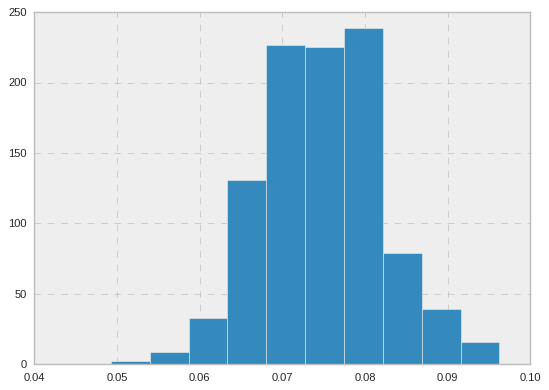

In [135]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_colums, all_labels, test_size=0.25)

    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies)

###Validacion

Ahora vamos a validar nuestro modelo de arbol utilzando otro modelo

Text(0.5, 1.0, 'Average score: 0.07782989259310921')

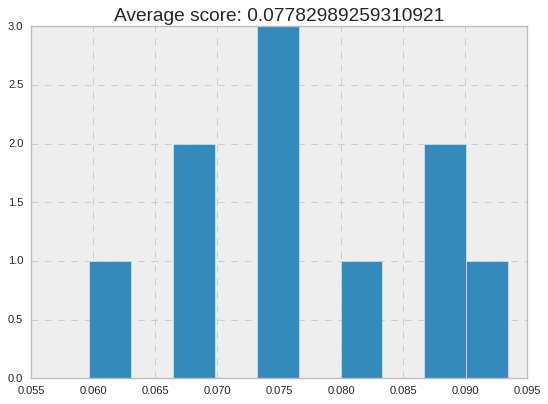

In [149]:
from sklearn.model_selection import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score nos va a devuelver una lista de las scores, que podemos visualizar
# para obtener una estimación razonable del rendimiento de nuestro clasificador
cv_scores = cross_val_score(decision_tree_classifier, all_colums, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

###MSE

El MSE hace referencia al mean squared error o error cuadrático medio, que nos dice lo cerca que está una línea de regresión de un conjunto de puntos

In [137]:
# Realizar one-hot encoding para las variables categóricas
all_inputs_encoded = pd.get_dummies(all_colums)

# Dividir el conjunto de datos en entrenamiento y prueba
(training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(all_inputs_encoded, all_labels, test_size=0.25)

# Crear y entrenar el clasificador de Decision Tree
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)

# Validar el resultado sobre el set de testing con precisión y MSE
accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)


print('Accuracy: {}'.format(accuracy))


Accuracy: 0.07537313432835821


La métrica accuracy representa el porcentaje total de valores correctamente clasificados, tanto positivos como negativos, por lo que, este dato nos indica el porcentaje de casos que el modelo es acertado

In [138]:
from sklearn.preprocessing import LabelEncoder

# Crear el codificador de etiquetas
label_encoder = LabelEncoder()

# Convertir las etiquetas a valores numéricos
all_labels_encoded = label_encoder.fit_transform(all_labels)

# Dividir el conjunto de datos en entrenamiento y prueba
(training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(all_inputs_encoded, all_labels_encoded, test_size=0.25)

# Crear y entrenar el clasificador de Decision Tree
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)

# Predecir las etiquetas en el conjunto de prueba
predictions = decision_tree_classifier.predict(testing_inputs)

# Calcular el MSE entre las etiquetas verdaderas y las predicciones
mse = mean_squared_error(testing_classes, predictions)

print('MSE:', mse)

MSE: 48.34925373134328


el MSE mide el promedio de los cuadrados de los errores, es decir, la diferencia promedio al cuadrado entre los valores estimados y el valor real.

In [139]:
from sklearn.metrics import mean_squared_error

# ... Código anterior ...

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)

# Validar el resultado sobre el set de testing
accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)

# Calcular las predicciones del modelo
predictions = decision_tree_classifier.predict(testing_inputs)

# Calcular el MSE entre las etiquetas verdaderas y las predicciones
mse = mean_squared_error(testing_classes, predictions)

print('Accuracy:', accuracy)
print('MSE:', mse)

Accuracy: 0.07985074626865672
MSE: 46.6634328358209


### AJUSTES AL MODELO

probando el modelo anteriormente realizado podemos ver que en más datos con una representación completa de los posibles valores y tipos de datos de entrada

Text(0.5, 1.0, 'Average score: 0.07017471055935277')

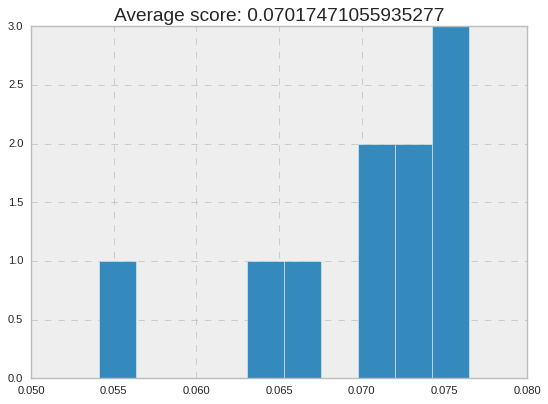

In [140]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

cv_scores = cross_val_score(decision_tree_classifier, all_colums, all_labels, cv=10)
plt.hist(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_colums, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.08902252754917003
Best parameters: {'max_depth': 4, 'max_features': 4}


Text(56.66666666666667, 0.5, 'Months_on_book')

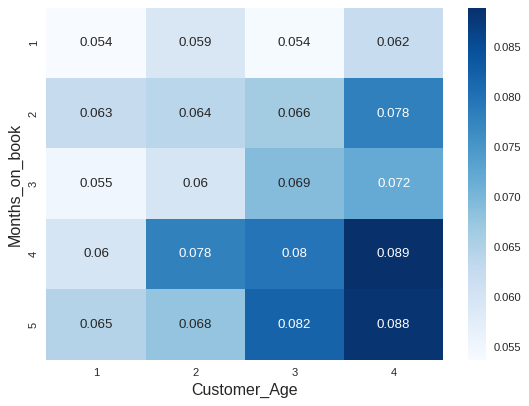

In [142]:
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('Customer_Age')
plt.ylabel('Months_on_book')

### Random Forest

Este paso facilita la evaluación de la importancia o contribución de las variables al modelo

In [143]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()

parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)

grid_search = GridSearchCV(random_forest_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_colums, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

grid_search.best_estimator_

Best score: 0.08827660761612499
Best parameters: {'criterion': 'gini', 'max_features': 3, 'n_estimators': 50}


RandomForestClassifier(max_features=3, n_estimators=50)

#### Comparación con la Random Forest y Arbol de decisión

<Axes: xlabel='classifier', ylabel='accuracy'>

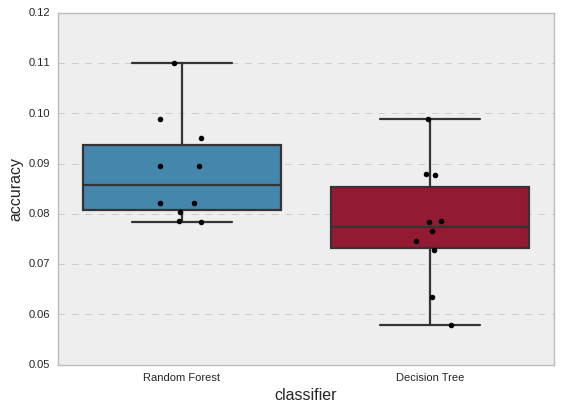

In [144]:
random_forest_classifier = grid_search.best_estimator_

rf_df = pd.DataFrame({'accuracy': cross_val_score(random_forest_classifier, all_colums, all_labels, cv=10),
                       'classifier': ['Random Forest'] * 10})
dt_df = pd.DataFrame({'accuracy': cross_val_score(decision_tree_classifier, all_colums, all_labels, cv=10),
                      'classifier': ['Decision Tree'] * 10})
both_df = rf_df.append(dt_df)

sb.boxplot(x='classifier', y='accuracy', data=both_df)
sb.stripplot(x='classifier', y='accuracy', data=both_df, jitter=True, color='black')

### ANALISIS DEL COMPONENTE PRINCIPAL (PCA)

Se busca reducir la dimensionalidad en los datos que puede ser utilizado para convertir un conjunto bastante grande de variables en un conjunto más pequeño que contenga la mayor cantidad de información contenida en el conjunto grande

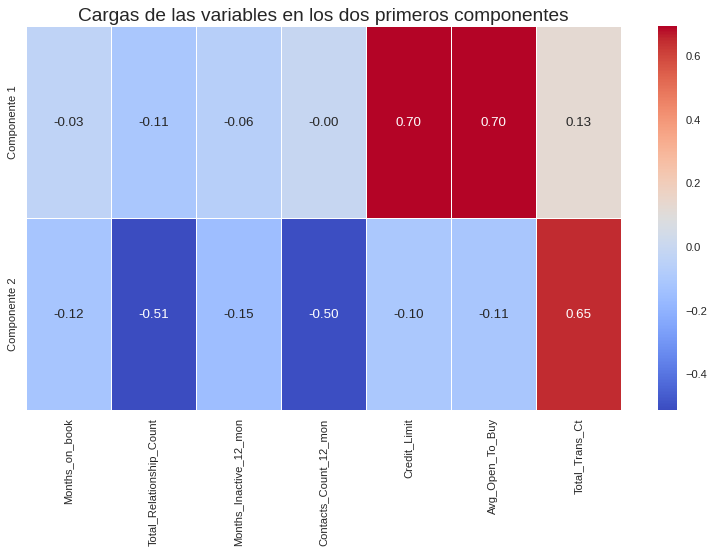

In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Estandarizar los datos
scaler = StandardScaler()
all_inputs_scaled = scaler.fit_transform(all_colums)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(all_inputs_scaled)

# Crear un DataFrame para visualizar las cargas de las variables
components_df = pd.DataFrame(pca.components_, columns=all_colums.columns, index=['Componente 1', 'Componente 2'])

# Visualizar las cargas de las variables en los dos primeros componentes
plt.figure(figsize=(12, 6))
sb.heatmap(components_df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Cargas de las variables en los dos primeros componentes')
plt.show()

In [147]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Preprocesar los datos: escalar las variables
scaler = StandardScaler()
all_inputs_scaled = scaler.fit_transform(all_inputs)

# Realizar el PCA completo sin reducir la dimensionalidad
pca = PCA(n_components=len(all_inputs.columns))
principal_components = pca.fit_transform(all_inputs_scaled)

# Crear un DataFrame para almacenar los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=[f'Component_{i+1}' for i in range(len(all_inputs.columns))])

# Mostrar las cargas de las variables en los dos primeros componentes principales
pca_loadings = pd.DataFrame(pca.components_.T, columns=[f'Component_{i+1}' for i in range(len(all_inputs.columns))])
print("Cargas de las variables en los dos primeros componentes principales:")
print(pca_loadings)

# Mostrar el porcentaje de varianza explicada por cada componente
print("\nPorcentaje de varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

Cargas de las variables en los dos primeros componentes principales:
   Component_1  Component_2  Component_3  Component_4  Component_5  \
0    -0.031299    -0.116952     0.699191     0.372820     0.573837   
1    -0.106362    -0.511173    -0.226267     0.547266    -0.339456   
2    -0.061355    -0.152673     0.669026    -0.303414    -0.657955   
3    -0.002019    -0.501970    -0.098979    -0.677419     0.339902   
4     0.696184    -0.103056     0.022806     0.047574    -0.035663   
5     0.695158    -0.114062     0.026116     0.039096    -0.035216   
6     0.126578     0.652771     0.036608    -0.082197    -0.067302   

   Component_6  Component_7  
0     0.167899    -0.000784  
1     0.511319    -0.003822  
2     0.018634     0.004266  
3     0.404688     0.004711  
4    -0.017425     0.707353  
5    -0.028376    -0.706746  
6     0.738332    -0.010333  

Porcentaje de varianza explicada por cada componente:
[0.2877335  0.18335792 0.15528893 0.13688034 0.12786853 0.10713693
 0.00173

### CROSSVALIDATION

La cross validation es un método que consiste en evaluar y probar el rendimiento de un modelo de machine learning anteriormente realizado

Cargas de las variables en los dos primeros componentes principales:
[[-0.03841865 -0.09957757 -0.06516592 -0.00289064  0.69763756  0.69657758
   0.11151176]
 [ 0.1032775   0.52978171  0.12280545  0.49756246  0.09378775  0.1055479
  -0.65274728]]

Porcentaje de varianza explicada por cada componente:
[0.28724997 0.18390026]

Accuracy promedio con validación cruzada (Decision Tree): 0.033595116685897194
Accuracy promedio con validación cruzada (Random Forest): 0.038330169600873445


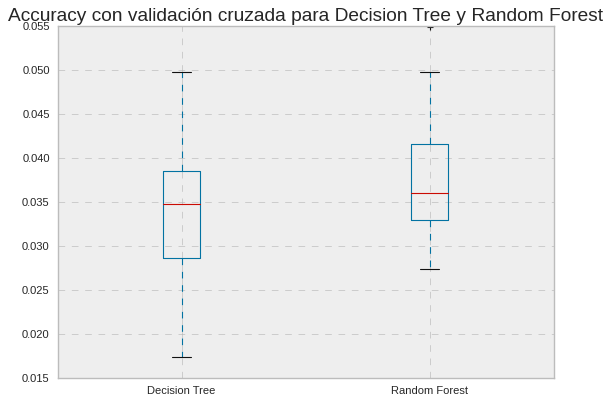

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt



# Dividimos el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(all_colums, all_labels, test_size=0.25, random_state=42)

# Normalizamos las características antes de aplicar el PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicamos el PCA con 2 componentes principales
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Imprimimos las cargas de las variables en los dos primeros componentes principales
print("Cargas de las variables en los dos primeros componentes principales:")
print(pca.components_)

# Imprimimos el porcentaje de varianza explicada por cada componente
print("\nPorcentaje de varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

# Creamos los modelos de clasificación
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=42)

# Realizamos la validación cruzada para el Decision Tree
dt_cv_scores = cross_val_score(decision_tree_classifier, X_train_pca, y_train, cv=10)
print("\nAccuracy promedio con validación cruzada (Decision Tree):", dt_cv_scores.mean())

# Realizamos la validación cruzada para el Random Forest
rf_cv_scores = cross_val_score(random_forest_classifier, X_train_pca, y_train, cv=10)
print("Accuracy promedio con validación cruzada (Random Forest):", rf_cv_scores.mean())

# Visualizamos los resultados
plt.boxplot([dt_cv_scores, rf_cv_scores], labels=['Decision Tree', 'Random Forest'])
plt.title('Accuracy con validación cruzada para Decision Tree y Random Forest')
plt.show()

#### Conclusion de modelo

En conclusion a la validacion de las prediciones vistas, se puede observar que Ramdom Forest fue mas versatil a la hora de estimar los resultados, en comprfaciona Arbol de decision.